In [16]:
include("../minima_analysis.jl")

generate_intermediate_patterns (generic function with 1 method)

In [4]:
N1k  = readdlm("../overlaps/N1000.txt", '\t', Float64, '\n')
N5k  = readdlm("../overlaps/N5000.txt", '\t', Float64, '\n')
N10k = readdlm("../overlaps/N10000.txt", '\t', Float64, '\n')
N20k = readdlm("../overlaps/N20000.txt", '\t', Float64, '\n')

1×800 Matrix{Float64}:
 0.0151  -0.0232  -0.0356  -0.0168  …  -0.0471  0.0192  -0.0293  0.0181

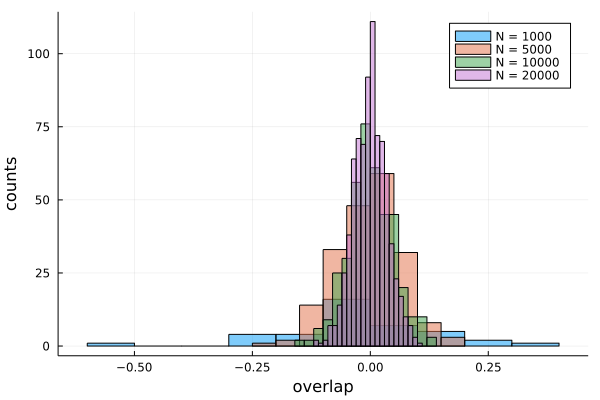

In [5]:
histogram([N1k', N5k', N10k', N20k'], fillalpha = 0.5,
    label = ["N = 1000" "N = 5000" "N = 10000" "N = 20000"], xlabel = "overlap",
ylabel = "counts")

In [6]:
Random.seed!(12)
N = 500
M = 50
ξ = SH.generate_patterns(M, N)
σ1 = ξ[:,1]
σ2 = ξ[:,2]
σ3 = ξ[:,3]
J = SH.store(ξ)

ξ12 = generate_intermediate_patterns(σ1, σ2)#, J)
ξ23 = generate_intermediate_patterns(σ2, σ3)

s12 = size(ξ12, 2)
s23 = size(ξ23, 2)

energies = zeros(s12 + s23 + 1)
energies[1] = SH.energy(J, σ1)
#energies[s12 + 1] = SH.energy(J, σ2)
#energies[end] = SH.energy(J, σ3)

for i in 1:s12
    energies[i + 1] = SH.energy(J, ξ12[:, i])
end

for i in 1:s23
 #   println(i)
    energies[s12 + 1 + i] = SH.energy(J, ξ23[:, i])
end

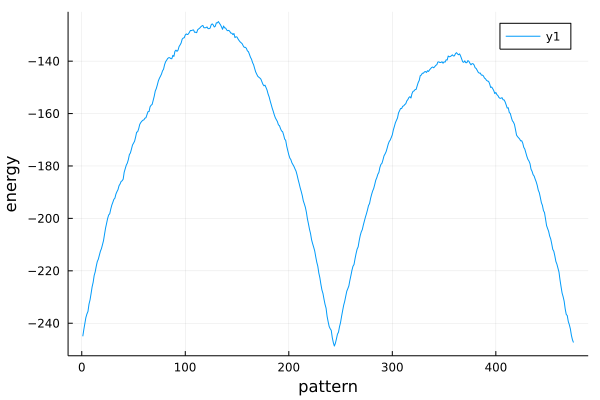

In [7]:
plot(energies, xlabel = "pattern", ylabel = "energy")

## Try to estimate the threshold

In [80]:
overlaps = zeros(1000)
for i in 1:1000
    N = 1000
    α = 0.1
    M = round(Int, N*α)
    ξ = SH.generate_patterns(M, N)
    J = SH.store(ξ)

    k = rand(1:M) #select a random pattern
    
    #println(k)
    σ = ξ[:,k]
    σ_new = SH.perturb(σ, 0.1)

    σ_new = SH.monte_carlo(J, σ; nsweeps = 200)
    overlap = σ_new ⋅ σ / N
    #if overlap < minimum
     #   minimum = overlap
    overlaps[i] = overlap
    #end
end

    #overlaps = (σ_new' * ξ) ./ N



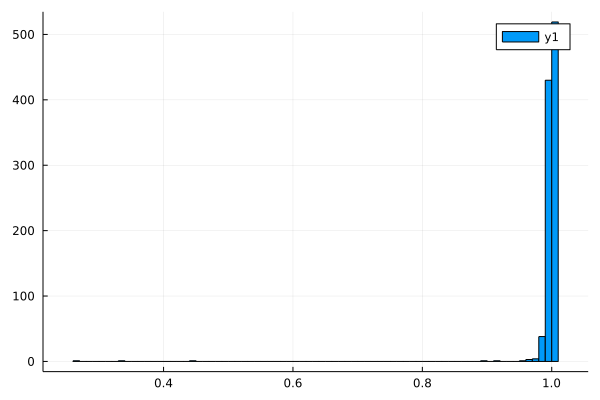

In [82]:
histogram(overlaps, nbins = 100)

In [90]:
findall(x -> x >=0.8, overlaps)

997-element Vector{Int64}:
    1
    2
    3
    4
    5
    6
    7
    8
    9
   10
   11
   12
   13
    ⋮
  989
  990
  991
  992
  993
  994
  995
  996
  997
  998
  999
 1000